In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
bechdel_imdb_budget = pd.read_csv('Bechdel with IMDB and Budget.csv')
print('Bechdel with Ratings and Budget')
print(bechdel_imdb_budget.head())
print(bechdel_imdb_budget.info())

Bechdel with Ratings and Budget
           bechdel.title   imdbid  bechdel_binary bechdel_test  2_named_women  \
0             Mr. Nobody   485947               0         FAIL           True   
1  10 Days In A Madhouse  3453052               1         PASS           True   
2              Say Uncle   401385               0         FAIL           True   
3                  Vamps  1545106               1         PASS           True   
4                 August   115591               1         PASS           True   

   talk_to_each_other  not_about_men  year  genre1    genre2  ...  \
0               False          False  2009   Drama   Fantasy  ...   
1                True           True  2016   Drama       NaN  ...   
2                True          False  2005  Comedy     Drama  ...   
3                True           True  2012  Comedy    Horror  ...   
4                True           True  1996  Comedy     Drama  ...   

  females_45age_votes  us_voters_rating us_voters_votes non_us_vot

Though there was not a strong correlation between budget and Bechdel Pass/Fail when run with a correlation coefficient, it may be worth a more nuanced look. 

In [3]:
bechdel_fail_budget = bechdel_imdb_budget[bechdel_imdb_budget["bechdel_test"] == "FAIL"]
bechdel_pass_budget = bechdel_imdb_budget[bechdel_imdb_budget["bechdel_test"] == "PASS"]

bechdel_pass_budget_curr = bechdel_pass_budget[bechdel_pass_budget['year']>=1990]
bechdel_pass_avgbudget = bechdel_pass_budget_curr['budget'].dropna().mean()
print('Average Budget of Movies that Pass, 1990 Forward: $',int(bechdel_pass_avgbudget))

bechdel_pass_budget_curr = bechdel_pass_budget[bechdel_pass_budget['year']>=1990]
bechdel_pass_medbudget = bechdel_pass_budget_curr['budget'].dropna().median()
print('Median Budget of Movies that Pass, 1990 Forward: $',int(bechdel_pass_medbudget))

bechdel_fail_budget_curr = bechdel_fail_budget[bechdel_fail_budget['year']>=1990]
bechdel_fail_avgbudget = bechdel_fail_budget_curr['budget'].dropna().mean()
print('Average Budget of Movies that Fail, 1990 Forward: $',int(bechdel_fail_avgbudget))

bechdel_fail_budget_curr = bechdel_fail_budget[bechdel_fail_budget['year']>=1990]
bechdel_fail_medbudget = bechdel_fail_budget_curr['budget'].dropna().median()
print('Median Budget of Movies that Fail, 1990 Forward: $',int(bechdel_fail_medbudget))


Average Budget of Movies that Pass, 1990 Forward: $ 40760487
Median Budget of Movies that Pass, 1990 Forward: $ 23000000
Average Budget of Movies that Fail, 1990 Forward: $ 52804784
Median Budget of Movies that Fail, 1990 Forward: $ 38000000


Movies passing the Bechdel Test do have lower mean and median budgets than movies failing the test. This is not surprising, if disheartening. However, for a medium-sized production company like ours, it can also be seen in a positive light, in that movies passing the Bechdel Test can be made successfully with lower overall budgets.

<b>Now we are going to look at Box Office Gross and Profit Margins</b>

In [4]:
total_gross_pass = bechdel_pass_budget['dom_gross'].dropna() + bechdel_pass_budget['int_gross'].dropna()
print('Average Box Office Gross of Movies that Pass $', int(total_gross_pass.mean()))
print('Median Box Office Gross of Movies that Pass $', int(total_gross_pass.median()))

total_gross_fail = bechdel_fail_budget['dom_gross'].dropna() + bechdel_fail_budget['int_gross'].dropna()
print('Average Box Office Gross of Movies that Fail $', int(total_gross_fail.mean()))
print('Median Box Office Gross of Movies that Fail $', int(total_gross_fail.median()))

Average Box Office Gross of Movies that Pass $ 206334727
Median Box Office Gross of Movies that Pass $ 97821128
Average Box Office Gross of Movies that Fail $ 200352313
Median Box Office Gross of Movies that Fail $ 112550361


The mean box office gross is 6M higher for movies passing the Bechdel Test vs. movies failing. The median is 15M higher for movies that fail vs. movies that pass. So, depending on which metric you look at, movies passing the Bechdel Test may be more lucrative than those that don't. Of course, the opposite conclusion can be put forth but the bottom line is that, based on box office gross alone, a there is not strong case against including female lead characters. 

<b>Now let's look at profit margins</b>

In [5]:
dropna_budget_pass = bechdel_pass_budget.dropna()
budget_pass = dropna_budget_pass['budget']
total_gross_pass = dropna_budget_pass['dom_gross'] + dropna_budget_pass['int_gross']
profit_pass = total_gross_pass - budget_pass
profit_margin_pass = profit_pass/total_gross_pass
print('Average Profit Margin of Movies that Pass', (round(profit_margin_pass.mean(),2))*100,'%')
print('Median Profit Margin of Movies that Pass', (round(profit_margin_pass.median(),2))*100,'%')

dropna_budget_fail = bechdel_fail_budget.dropna()
budget_fail = dropna_budget_fail['budget']
total_gross_fail = dropna_budget_fail['dom_gross'] + dropna_budget_fail['int_gross']
profit_fail = total_gross_fail - budget_fail
profit_margin_fail = profit_fail/total_gross_fail
print('Average Profit Margin of Movies that Fail',(round(profit_margin_fail.mean(),2))*100,'%')
print('Median Profit Margin of Movies that Fail', (round(profit_margin_fail.median(),2))*100,'%')


Average Profit Margin of Movies that Pass 18.0 %
Median Profit Margin of Movies that Pass 77.0 %
Average Profit Margin of Movies that Fail -158.0 %
Median Profit Margin of Movies that Fail 73.0 %


Average and median pofit margins are BOTH higher for movies that pass vs. those that fail, so there truly is no fiscal justification to produce movies without female characters. It might be worth taking a look at films in a realistic budget range for us, to see if the major blockbusters with huge budgets are skewing the margins.

In [6]:
dropna_budget_pass = bechdel_pass_budget.dropna()
budget_30_pass = dropna_budget_pass[dropna_budget_pass['budget']<=30000000]
budget_pass_real = budget_30_pass['budget']
gross_pass_real = budget_30_pass['dom_gross'] + budget_30_pass['int_gross']
profit_pass_real = gross_pass_real - budget_pass_real
profit_margin_pass_real = profit_pass_real/gross_pass_real
print('Average Profit Margin of Movies that Pass, $30M and Under', (round(profit_margin_pass_real.mean(),1))*100,'%')
print('Median Profit Margin of Movies that Pass, $30M and Under', (round(profit_margin_pass_real.median(),2))*100,'%')

dropna_budget_fail = bechdel_fail_budget.dropna()
budget_30_fail = dropna_budget_fail[dropna_budget_fail['budget']<=30000000]
budget_fail_real = budget_30_fail['budget']
gross_fail_real = budget_30_fail['dom_gross'] + budget_30_fail['int_gross']
profit_fail_real = gross_fail_real - budget_fail_real
profit_margin_fail_real = profit_fail_real/gross_fail_real
print('Average Profit Margin of Movies that Fail, $30M and Under', (round(profit_margin_fail_real.mean(),2))*100,'%')
print('Median Profit Margin of Movies that Fail, $30M and Under', (round(profit_margin_fail_real.median(),2))*100,'%')


Average Profit Margin of Movies that Pass, $30M and Under -10.0 %
Median Profit Margin of Movies that Pass, $30M and Under 82.0 %
Average Profit Margin of Movies that Fail, $30M and Under -1.0 %
Median Profit Margin of Movies that Fail, $30M and Under 80.0 %


Movies with budgets 30M and under show similar trends, though the averages are negative, meaning there must be a roughly equal amount of movies losing money as making it. From here on out, we will focus on median as our profit margin metric as a more realistic goal. The medians are not significantly different between the full data set and limiting to movies with budgets under 30 million, so we will use our full data set for subsequent analysis. 

<b>Is there a sweet spot in terms of budget spent and profit margin?</b>

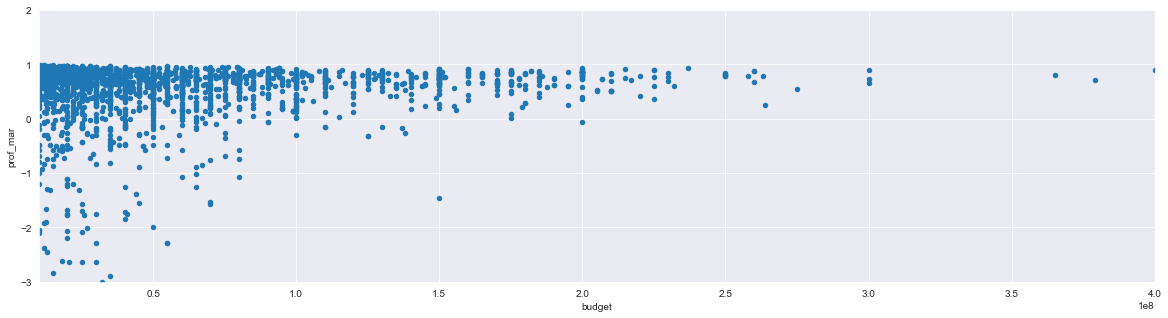

In [7]:
bechdel_imdb_budget.plot.scatter('budget', 'prof_mar')
plt.xlim(10000000, 400000000)
plt.ylim(-3, 2)
plt.show()

There isn't a linear correlation between budget and profit margin, but it does seem that there are fewer negative profit margin films once the budgets get to 80M and above, so our long-term goal should be to earn enough profit to produce films in the 50-100M range as opposed to 30M or under, which will be the limit for our initial project. 

<b>What about between box office gross and profit margin?</b>

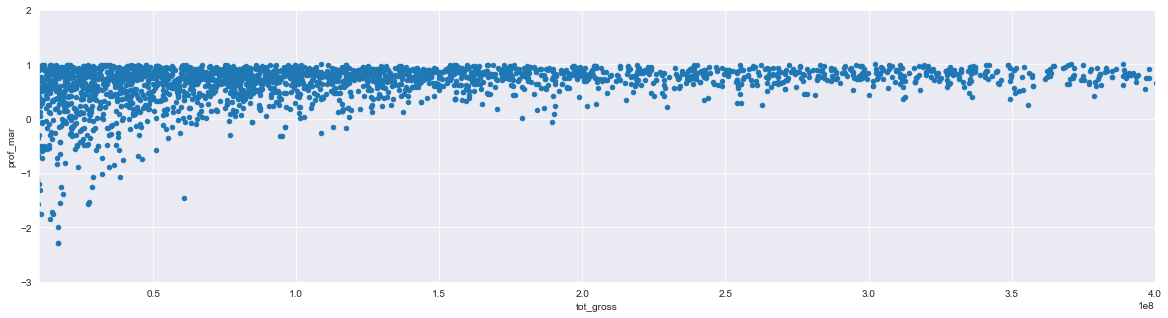

In [8]:
bechdel_imdb_budget.plot.scatter('tot_gross', 'prof_mar')
plt.xlim(10000000, 400000000)
plt.ylim(-3, 2)
plt.show()

Still not a clear linear relationship but it does seem that a movie with at least a 150M Box Office Gross is very likely to have a high profit margin.

<b>Genres with High Box Office Gross</b>

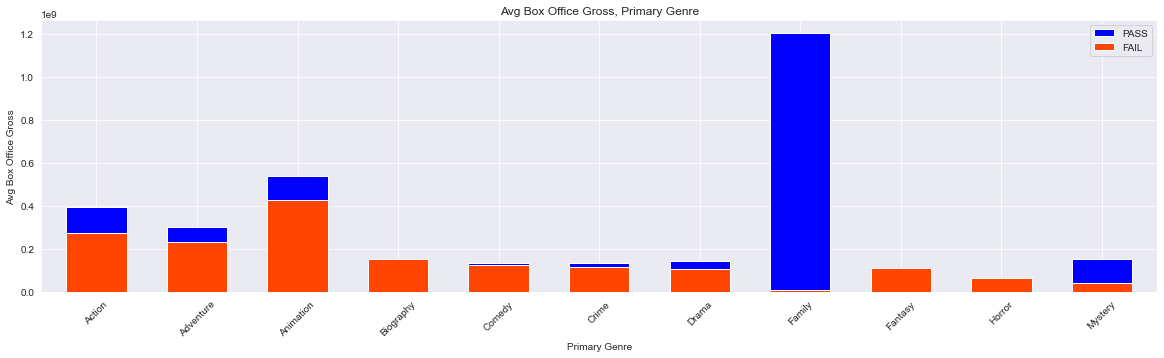

In [19]:
genre1_gross_pass = dropna_budget_pass.groupby(['genre1'])['tot_gross'].mean() 
genre1_gross_fail = dropna_budget_fail.groupby(['genre1'])['tot_gross'].mean()
genre1_gross_pass.plot.bar(width=0.6, color='blue')
genre1_gross_fail.plot.bar(width=0.6, color='orangered')
plt.legend(["PASS", "FAIL"])
plt.xticks(rotation=45)
plt.ylabel('Avg Box Office Gross')
plt.xlabel('Primary Genre')
plt.title('Avg Box Office Gross, Primary Genre')
plt.show()

Family films would appear to have the highest box office gross for primary genre for films passing the Bechdel test. Action and Animation have lower box office gross for films passing than failing, while Mystery has a higher gross for films passing than failing.

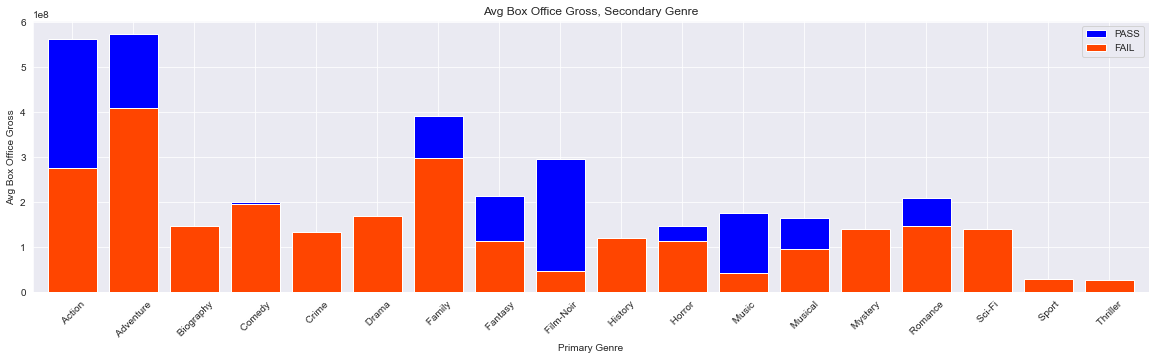

In [10]:
genre2_gross_pass = dropna_budget_pass.groupby(['genre2'])['tot_gross'].mean()
genre2_gross_fail = dropna_budget_fail.groupby(['genre2'])['tot_gross'].mean()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
genre2_gross_pass.plot.bar(width=0.8, color='blue')
genre2_gross_fail.plot.bar(width=0.8, color='orangered')
plt.legend(["PASS", "FAIL"])
plt.xticks(rotation=45)
plt.ylabel('Avg Box Office Gross')
plt.xlabel('Primary Genre')
plt.title('Avg Box Office Gross, Secondary Genre')
plt.show()

Looking at secondary genre, Action and Adventure have the highest averages with Family still a contender. Action films seem to have just as high of returns for films that pass as for ones that fail. Film Noir and Music have strong average gross numbers and are higher grossing for films that pass than films that fail. 

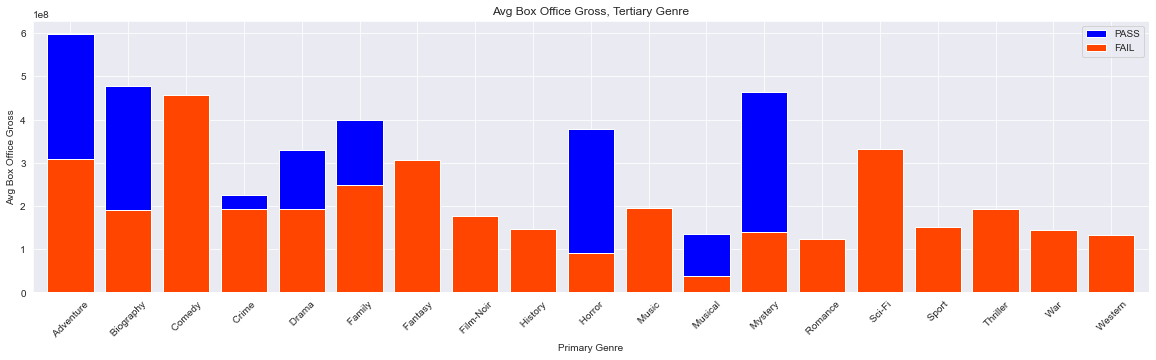

In [11]:
genre3_gross_pass = dropna_budget_pass.groupby(['genre3'])['tot_gross'].mean()
genre3_gross_fail = dropna_budget_fail.groupby(['genre3'])['tot_gross'].mean()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
genre3_gross_pass.plot.bar(width=0.8, color='blue')
genre3_gross_fail.plot.bar(width=0.8, color='orangered')
plt.legend(["PASS", "FAIL"])
plt.xticks(rotation=45)
plt.ylabel('Avg Box Office Gross')
plt.xlabel('Primary Genre')
plt.title('Avg Box Office Gross, Tertiary Genre')
plt.show()

When it comes to tertiary genre, Horror, Mystery, and Biography all have high box office gross specifically for films that pass. Adventure has had overall gross numbers and roughly equal average gross for films passing vs. failing.

<b>Genres with High Profit Margins</b>
<p>Note that we are only looking at movies passing the Bechdel Test and we are using median profit margin as our measure</p>

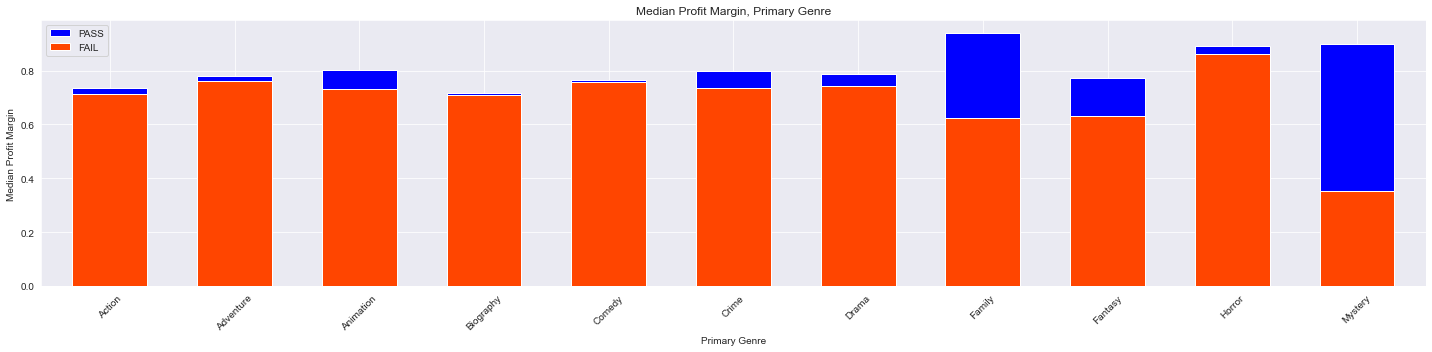

In [22]:
genre1_profit_pass = dropna_budget_pass.groupby(['genre1'])['prof_mar'].median() 
genre1_profit_fail = dropna_budget_fail.groupby(['genre1'])['prof_mar'].median() 
genre1_profit_pass.plot.bar(width=0.6, color='blue')
genre1_profit_fail.plot.bar(width=0.6, color='orangered')
plt.legend(['PASS', 'FAIL'])
plt.xticks(rotation=45)
plt.ylabel('Median Profit Margin')
plt.xlabel('Primary Genre')
plt.title('Median Profit Margin, Primary Genre')
plt.tight_layout()
plt.show()

Family and Mystery have the highest median profit margins for primary genre. However, Mystery higher median profit margins specifically for films that pass.

Just out of curiosity, I ran average profit margin per genre.

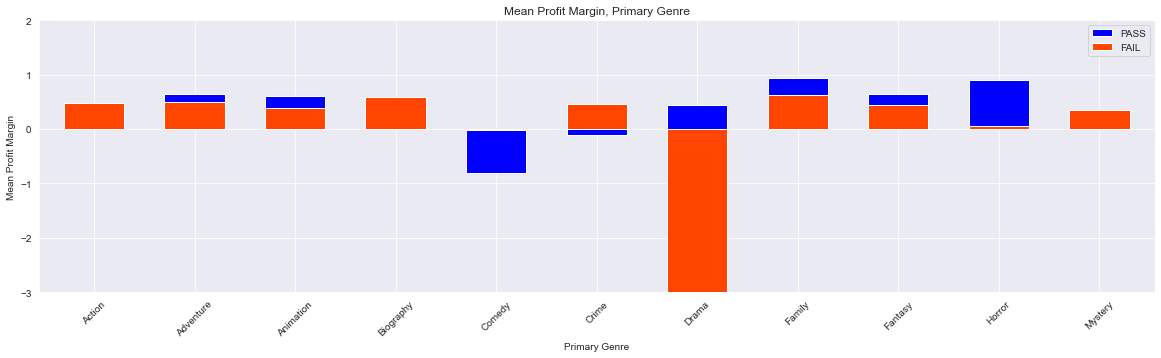

In [23]:
genre1_profit_pass = dropna_budget_pass.groupby(['genre1'])['prof_mar'].mean() 
genre1_profit_fail = dropna_budget_fail.groupby(['genre1'])['prof_mar'].mean() 
genre1_profit_pass.plot.bar(width=0.6, color='blue')
genre1_profit_fail.plot.bar(width=0.6, color='orangered')
plt.xticks(rotation=45)
plt.ylim(-3, 2)
plt.legend(['PASS', 'FAIL'])
plt.ylabel('Mean Profit Margin')
plt.xlabel('Primary Genre')
plt.title('Mean Profit Margin, Primary Genre')
plt.show()

Family and Horror looking like the best bets there, especially with averages that are higher for movies that pass. Worth noting is that Comedy has a significant negative profit margin, which would suggest that Comedy films are either hits or flops with little consistancy. Also worth noting is that while dramas that fail the Bechdel Test have a signficant negative profit margin on average, those that pass have a 50% average margin. Dramas should certainly be on our list.  

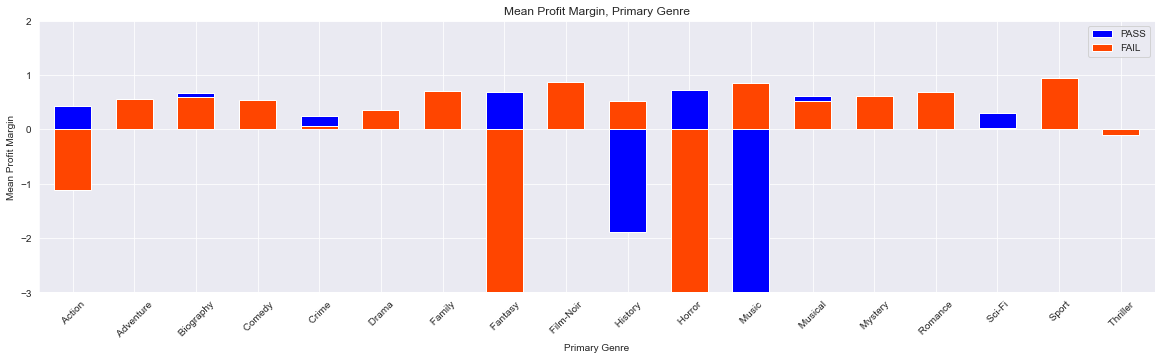

In [24]:
genre2_profit_pass = dropna_budget_pass.groupby(['genre2'])['prof_mar'].mean() 
genre2_profit_fail = dropna_budget_fail.groupby(['genre2'])['prof_mar'].mean() 
genre2_profit_pass.plot.bar(width=0.6, color='blue')
genre2_profit_fail.plot.bar(width=0.6, color='orangered')
plt.xticks(rotation=45)
plt.ylim(-3, 2)
plt.legend(['PASS', 'FAIL'])
plt.ylabel('Mean Profit Margin')
plt.xlabel('Primary Genre')
plt.title('Mean Profit Margin, Primary Genre')
plt.show()

Action, Fantasy, and Horror all have high average profit margins for secondary genre, specifically for films that pass. Interestingly, we see that Action films failing the test have a negative profit margin. We should stay away from History films for the moment. 

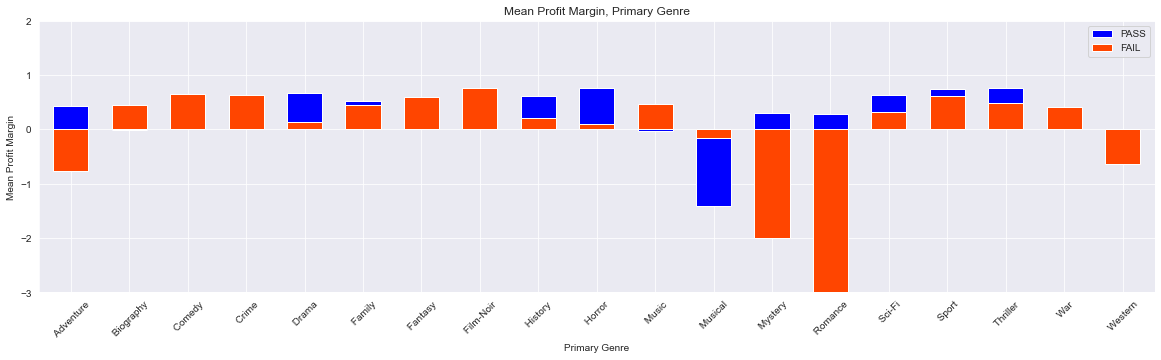

In [25]:
genre3_profit_pass = dropna_budget_pass.groupby(['genre3'])['prof_mar'].mean() 
genre3_profit_fail = dropna_budget_fail.groupby(['genre3'])['prof_mar'].mean() 
genre3_profit_pass.plot.bar(width=0.6, color='blue')
genre3_profit_fail.plot.bar(width=0.6, color='orangered')
plt.xticks(rotation=45)
plt.ylim(-3, 2)
plt.legend(['PASS', 'FAIL'])
plt.ylabel('Mean Profit Margin')
plt.xlabel('Primary Genre')
plt.title('Mean Profit Margin, Primary Genre')
plt.show()

Horror, Drama, and Adventure looking good here for movies that pass. 

<b>Which Directors Make the Most Commercially Successful Movies?</b>


Directors making Bechdel Pass movies with highest box office gross:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'James Cameron'),
  Text(1, 0, 'Anthony Russo, Joe Russo'),
  Text(2, 0, 'Chris Buck, Jennifer Lee'),
  Text(3, 0, 'Anna Boden, Ryan Fleck'),
  Text(4, 0, 'Jon Favreau'),
  Text(5, 0, 'Andrew Stanton, Angus MacLane'),
  Text(6, 0, 'Josh Cooley'),
  Text(7, 0, 'Lee Unkrich'),
  Text(8, 0, 'Todd Phillips'),
  Text(9, 0, 'Kyle Balda, Pierre Coffin'),
  Text(10, 0, 'Andrew Adamson, Kelly Asbury'),
  Text(11, 0, 'Jake Kasdan'),
  Text(12, 0, 'Byron Howard, Rich Moore'),
  Text(13, 0, 'Jon Watts'),
  Text(14, 0, 'Pete Docter, Ronnie Del Carmen'),
  Text(15, 0, 'David Yates'),
  Text(16, 0, 'Colin Trevorrow'),
  Text(17, 0, 'Christopher Nolan'),
  Text(18, 0, 'Chris Miller, Raman Hui'),
  Text(19, 0, 'Gary Ross'),
  Text(20, 0, 'Pierre Coffin, Chris Renaud'),
  Text(21, 0, 'Ryan Coogler'),
  Text(22, 0, 'Brad Bird'),
  Text(23, 0, 'Lee Unkrich,

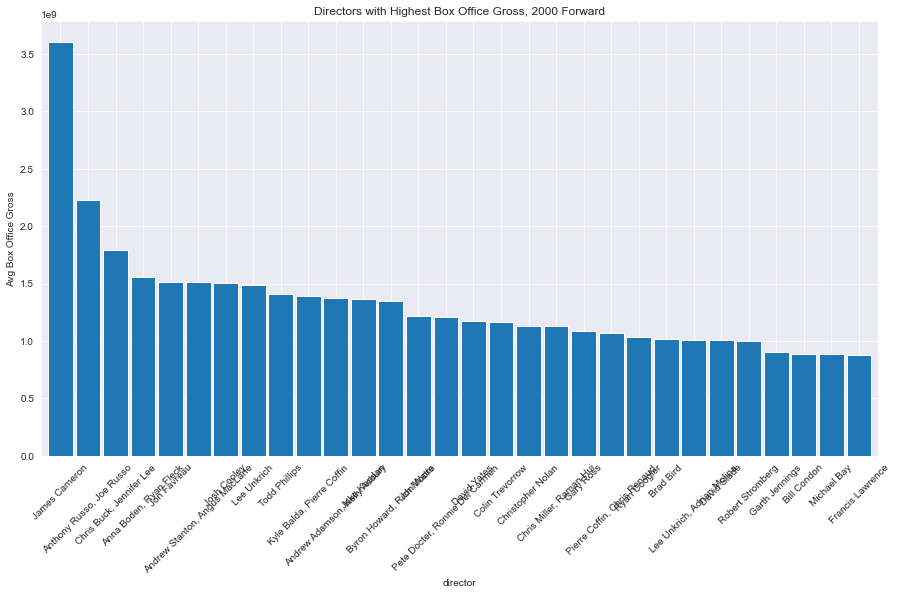

In [32]:
dropna_budget_pass_mod = dropna_budget_pass[dropna_budget_pass['year']>=2000]
director_gross_pass = dropna_budget_pass_mod.groupby(['director'])['tot_gross'].mean().nlargest(30)
director_gross_pass.plot(kind='bar', title='Directors with Highest Box Office Gross, 2000 Forward',
                    ylabel='Avg Box Office Gross', xlabel='director', figsize=(15, 8), width=0.9)
plt.xticks(rotation=45)

<b>Directors With the Highest Average Profit Margins</b>
<p>Here we are using mean profit margin as with directors, it is useful to note if there is consistancy in succcessful movies or if there are large successes and large failures that cancel each other out.</p>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Oren Peli'),
  Text(1, 0, 'Joel Zwick'),
  Text(2, 0, 'Levan Gabriadze'),
  Text(3, 0, 'Daniel Stamm'),
  Text(4, 0, 'Adam Wingard'),
  Text(5, 0, 'Michael Tiddes'),
  Text(6, 0, 'Lynn Shelton'),
  Text(7, 0, 'Jordan Peele'),
  Text(8, 0, 'Nitesh Tiwari'),
  Text(9, 0, 'Kenny Ortega'),
  Text(10, 0, 'Stiles White'),
  Text(11, 0, 'Leigh Whannell'),
  Text(12, 0, 'Adrienne Shelly'),
  Text(13, 0, 'Todd Phillips'),
  Text(14, 0, 'Duncan Tucker'),
  Text(15, 0, 'Zach Braff'),
  Text(16, 0, 'David Gordon Green'),
  Text(17, 0, 'James DeMonaco'),
  Text(18, 0, 'Benh Zeitlin'),
  Text(19, 0, 'Michael Showalter'),
  Text(20, 0, 'Andrew Adamson, Kelly Asbury'),
  Text(21, 0, 'David Robert Mitchell'),
  Text(22, 0, 'Kyle Balda, Pierre Coffin'),
  Text(23, 0, 'James Wan'),
  Text(24, 0, 'John Madden'),
  Text(25, 0, 'Martin McDonagh'),
  Text(26,

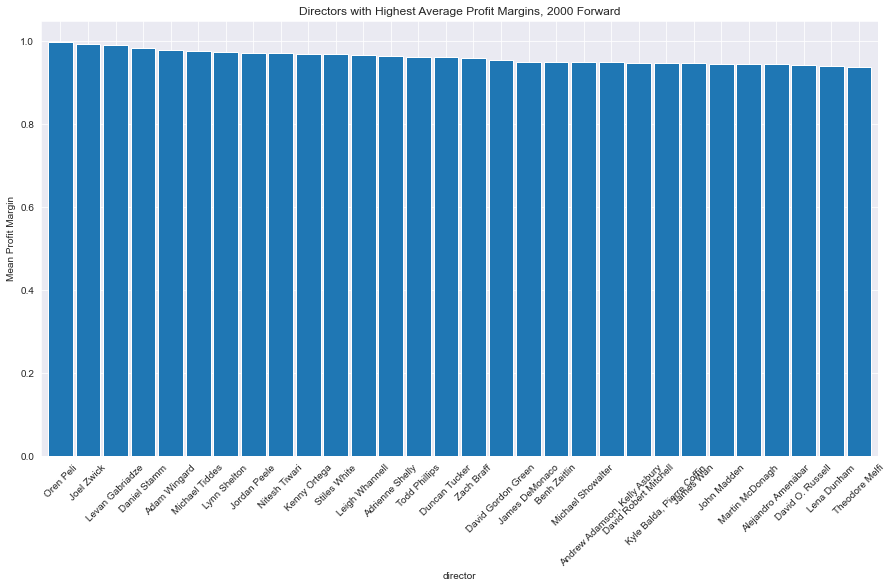

In [31]:
dropna_budget_pass_mod = dropna_budget_pass[dropna_budget_pass['year']>=2000]
director_prof_pass = dropna_budget_pass_mod.groupby(['director'])['prof_mar'].mean().nlargest(30)
director_prof_pass.plot(kind='bar', title='Directors with Highest Average Profit Margins, 2000 Forward',
                    ylabel='Mean Profit Margin', xlabel='director', figsize=(15, 8), width=0.9)
plt.xticks(rotation=45)

<b>Writers and Average Box Office Gross</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'James Cameron'),
  Text(1, 0, 'Rick Jaffa, Amanda Silver'),
  Text(2, 0, 'Christopher Markus, Stephen McFeely'),
  Text(3, 0, 'Ryan Coogler, Joe Robert Cole'),
  Text(4, 0, 'Joss Whedon, Stan Lee'),
  Text(5, 0, 'Jeff Nathanson, Irene Mecchi'),
  Text(6, 0, 'Jennifer Lee, Hans Christian Andersen'),
  Text(7, 0, 'Derek Connolly, Colin Trevorrow'),
  Text(8, 0, 'Anna Boden, Ryan Fleck'),
  Text(9, 0, 'Andrew Stanton, Andrew Stanton'),
  Text(10, 0, 'Brian Lynch'),
  Text(11, 0, 'John Lasseter, Andrew Stanton'),
  Text(12, 0, 'David Leslie Johnson-McGoldrick, Will Beall'),
  Text(13, 0, 'Gary Scott Thompson, Chris Morgan'),
  Text(14, 0, 'Neal Purvis, Robert Wade'),
  Text(15, 0, 'Todd Phillips, Scott Silver'),
  Text(16, 0, 'William Steig, Andrew Adamson'),
  Text(17, 0, 'Brad Bird'),
  Text(18, 0, 'Byron Howard, Rich Moore'),
  Text(19, 

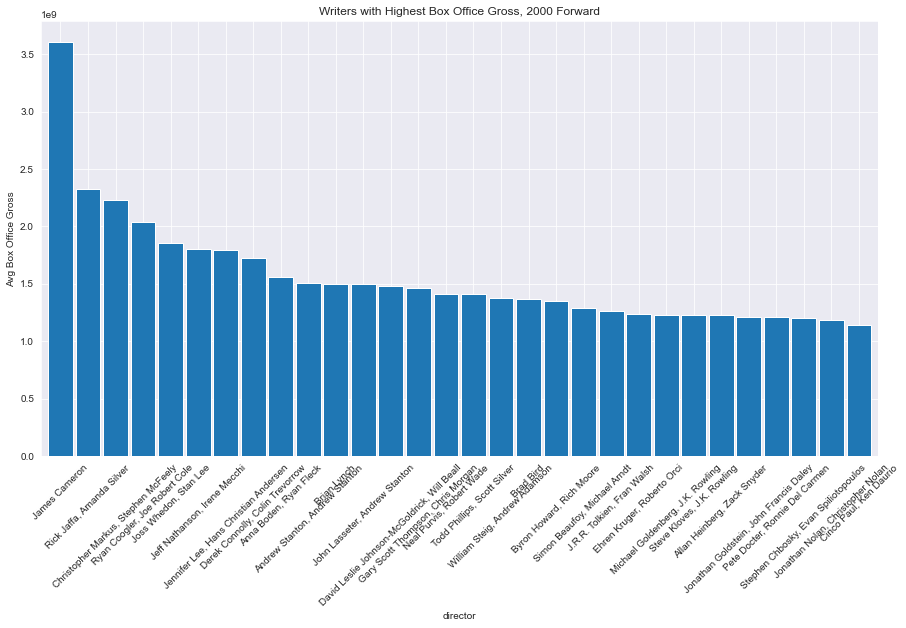

In [35]:
dropna_budget_pass_mod = dropna_budget_pass[dropna_budget_pass['year']>=2000]
director_gross_pass = dropna_budget_pass_mod.groupby(['writer'])['tot_gross'].mean().nlargest(30)
director_gross_pass.plot(kind='bar', title='Writers with Highest Box Office Gross, 2000 Forward',
                    ylabel='Avg Box Office Gross', xlabel='director', figsize=(15, 8), width=0.9)
plt.xticks(rotation=45)

None of these are on our other shortlist.

<b>Writers and Profit Margin</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Oren Peli'),
  Text(1, 0, 'Nia Vardalos'),
  Text(2, 0, 'Leigh Whannell'),
  Text(3, 0, 'Nelson Greaves'),
  Text(4, 0, 'Christopher Landon, Oren Peli'),
  Text(5, 0, 'Huck Botko, Andrew Gurland'),
  Text(6, 0, 'Gary Dauberman'),
  Text(7, 0, 'Simon Barrett'),
  Text(8, 0, 'Eric Heisserer, David F. Sandberg'),
  Text(9, 0, 'Marlon Wayans, Rick Alvarez'),
  Text(10, 0, 'Christopher Landon, Chad Feehan'),
  Text(11, 0, 'Lynn Shelton'),
  Text(12, 0, 'Ryan Coogler'),
  Text(13, 0, 'Scott Lobdell'),
  Text(14, 0, 'Jordan Peele'),
  Text(15, 0, 'Sabrina Dhawan'),
  Text(16, 0, 'Piyush Gupta, Shreyas Jain'),
  Text(17, 0, 'Peter Barsocchini, Peter Barsocchini'),
  Text(18, 0, 'Damien Chazelle'),
  Text(19, 0, 'Leigh Whannell, Leigh Whannell'),
  Text(20, 0, 'Adrienne Shelly'),
  Text(21, 0, 'Gary Dauberman, Gary Dauberman'),
  Text(22, 0, 'Bo

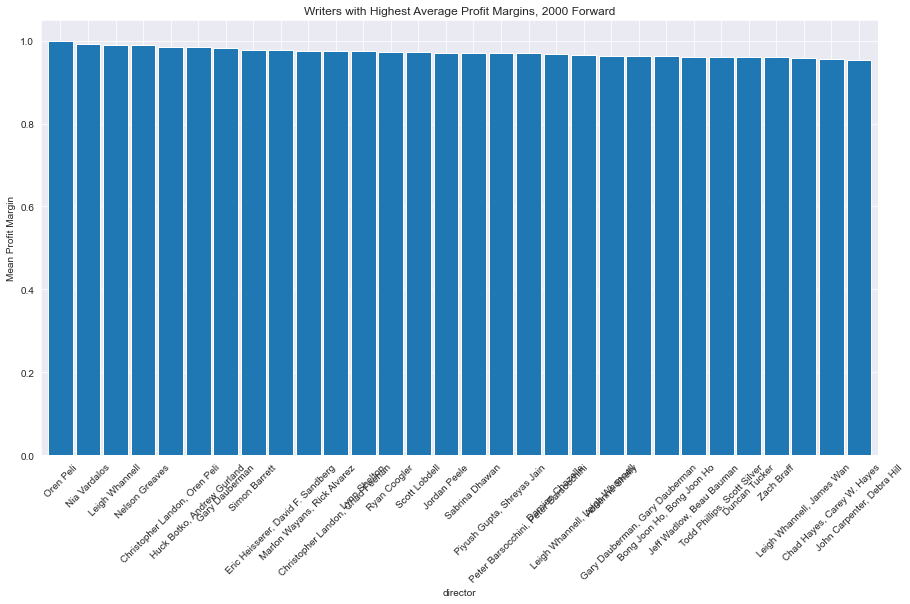

In [37]:
dropna_budget_pass_mod = dropna_budget_pass[dropna_budget_pass['year']>=2000]
director_prof_pass = dropna_budget_pass_mod.groupby(['writer'])['prof_mar'].mean().nlargest(30)
director_prof_pass.plot(kind='bar', title='Writers with Highest Average Profit Margins, 2000 Forward',
                    ylabel='Mean Profit Margin', xlabel='director', figsize=(15, 8), width=0.9)
plt.xticks(rotation=45)

Also not on our previous shortlist.

<b>Average Budget for Films Passing Bechdel Test from Companies Like Us</b>

In [18]:
dimension = dropna_budget_pass[dropna_budget_pass['production_company']=='Dimension Films']
dimension_mean_budg = round(dimension['budget'].mean(),0)
print('Average Budget for Dimension Films Bechdel Pass: $', dimension_mean_budg)

miramax = dropna_budget_pass[dropna_budget_pass['production_company']=='Miramax']
miramax_mean_budg = round(miramax['budget'].mean(),0)
print('Average Budget for Miramax Bechdel Pass: $', miramax_mean_budg)

blumhouse = dropna_budget_pass[dropna_budget_pass['production_company']=='Blumhouse Productions']
blumhouse_mean_budg = round(blumhouse['budget'].mean(),0)
print('Average Budget for Blumhouse Productions Bechdel Pass: $', blumhouse_mean_budg)


Average Budget for Dimension Films Bechdel Pass: $ 27100000.0
Average Budget for Miramax Bechdel Pass: $ 28141667.0
Average Budget for Blumhouse Productions Bechdel Pass: $ 9502778.0


Based on these numbers, it would appear that a budget of 9M - 30M is reasonable

<b>Average Profit Margins for Production Companies Like Us</b>

In [44]:
dimension = dropna_budget_pass[dropna_budget_pass['production_company']=='Dimension Films']
dimension_mean_prof_mar = dimension['prof_mar'].mean()
print('Average Profit Margin for Dimension Films Bechdel Pass:', round((dimension_mean_prof_mar*100),2), '%')

miramax = dropna_budget_pass[dropna_budget_pass['production_company']=='Miramax']
miramax_mean_prof_mar = miramax['prof_mar'].mean()
print('Average Profit Margin for Miramax Bechdel Pass:', round((miramax_mean_prof_mar*100),2), '%')

blumhouse = dropna_budget_pass[dropna_budget_pass['production_company']=='Blumhouse Productions']
blumhouse_mean_prof_mar = blumhouse['prof_mar'].mean()
print('Average Profit Margin for Blumhouse Productions Bechdel Pass:', round((blumhouse_mean_prof_mar*100),2), '%')

Average Profit Margin for Dimension Films Bechdel Pass: 12.52 %
Average Profit Margin for Miramax Bechdel Pass: 71.6 %
Average Profit Margin for Blumhouse Productions Bechdel Pass: 82.22 %


<b>Insights Based on Budget and Box Office Returns</b>
<ul>   
<li>I filtered for movies 1990 and forward so that budgets are accurate in modern dollars</li>
<li>Movies that pass the Bechdel Test have lower average and median budgets than those that fail
<ul>
<li>Mean Budget Pass: 40.8M</li>
<li>Median Budget Pass: 23M</li>
<li>Mean Budget Fail: 52.8M</li>
<li>Median Budget Fail: 38M</li>
    </ul>     
<li>Clearly, movies with prominent female characters are underfunded as a whole</li>
<li>Average box office gross is higher for movies that pass the Bechdel Test vs. those that fail, but medians are higher for those that fail than those that pass</li>
    <ul>
    <li>Mean Gross Pass: 206.3M</li>
    <li>Median Gross Pass: 97.8M</li>
    <li>Mean Gross Fail: 200.4M</li>
    <li>Median Gross Fail: 112.6M</li>
    </ul></ul>
   
    
            

  <b>Profit Margin Insights</b> 
    <ul>
<li>However, profit margins, both mean and median, are higher for movies that pass than for those that fail. Averages are significantly higher for passing films.</li>
         <ul>
        <li>Mean Profit Margin Pass: 18%</li>
        <li>Median Profit Margin Pass: 77%</li>
        <li>Mean Profit Margin Fail: -158%</li>
        <li>Median Profit Margin Fail: 73%</li>
    </ul>
    <ul>
    <li>I filtered for bugets 90M and under (as a reasonable budget for Savage Productions) to see if numbers were similar, which they are</li>
    <ul>
        <li>Mean Profit Margin Pass 90M and Under: -10%</li>
        <li>Median Profit Margin Pass 90M and Under: 82%</li>
        <li>Mean Profit Margin Fail 90M and Under: -1%</li>
        <li>Median Profit Margin Fail 90M and Under: 80%</li>
        </ul></ul>

<b>Genre and Box Office Gross</b>
<ul>
    <li>Family, Mystery, Action, Adventure, Film Noir, Horror, and Biography are the genres with the highest average box office gross numbers and higher box office gross for films that pass than those that fail</li>
</ul>
<p><b>Genre and Profit Margin (Median):</b> Family and Mystery have the highest median profit margins and higher margins for films that pass vs. fail.</p>
<p><b>Genre and Profit Margin (Mean):</b> Family, Horror, Drama, Action, Fantasy, and Adventure are the genres with high average profit margins and specifically higher average profit margins for films that pass than those that fail.</p>
  

<b>Directors and Box Office Gross/Profit Margin</b>
<ul>
<li>None of the directors who have films in the top 20 highest box office gross are on our shortlist of directors based on Bechdel Pass films, same goes for directors with top 20 highest profit margins, though profit margins are all very similar.</li>
    <li>Extending the list to top 30 and revising the timeline to be 2000 and forward, we have Michael Bay and John Madden on both lists</li></ul> 
    
   

<b>Writers and Box Office Gross/Profit Margin</b>
<ul>
<li>No crossover at all with our previous shortlist</li>
<li>Given the sheer number of writers, this is not surprising</li>
<li>I will look at the specific average Box Office Gross and Profit Margins of the writers on the shortlist in Tableau</li>
    <li>Useful to do this with Directors as well</li>
    </ul>

<b>Budgets and Projected Profit Margins</b>
<ul>
<li>Comparing average budgets of production companies similar to us, budget ranges from 9M - 30M seem reasonable</li>
    <li>There is a fairly wide variance between average profit margins of these three companies, but our projection would be a 50% profit margin as a fairly conservative estimate</li>